# Multiple dispatch

**Multiple dispatch** is a key feature of Julia, that we will explore in this notebook.

It helps make software fast. It also makes software extensible, programmable, and downright fun to play with. 

It may just herald a breakthrough for parallel computation.

1. Roman numerals
2. Functions
3. Parallel computing

## 1. Roman numerals (for fun)

Let's define a **new struct** that represents a Roman numeral. For coding simplicity, we'll just deal with numbers between 0 and 9. 



In [1]:
struct Roman
    n::Int
end

Base.show(io::IO, r::Roman) = print(io, 'ⅰ' + (r.n - 1) % 10)  # nice display; 'ⅰ' is a Unicode Roman numeral

We can create an object of this type as follows:

In [2]:
Roman(4)

ⅳ

In [3]:
typeof.([5 5.0 Roman(5) "Five" '5'  5//1])

1×6 Matrix{DataType}:
 Int64  Float64  Roman  String  Char  Rational{Int64}

We would like to display it nicely, in Roman numerals:

In [4]:
x = [7 1 2 5 8 9]
Roman.(x)   # equivalent to map(Roman, x)  or  [Roman(w) for w in x]

1×6 Matrix{Roman}:
 ⅶ  ⅰ  ⅱ  ⅴ  ⅷ  ⅸ

It'd be nice to be able to add Roman numerals together like normal numbers:

In [5]:
Roman(4) + Roman(5)

LoadError: MethodError: no method matching +(::Roman, ::Roman)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560

But Julia doesn't know how to do that. Let's teach it by `import`ing the `+` function, which then allows us to _extend_ its definition:

In [6]:
import Base: +, *

+(a::Roman, b::Roman) = Roman(a.n + b.n)

+ (generic function with 191 methods)

In [7]:
Roman(4) + Roman(5)

ⅸ

This **adds a new method** to the function `+`:

In [8]:
methods(+)

# 191 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:376
[5] +(c::Union{Int16, Int32, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:384
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:392
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\Dates\src\periods.jl:362
[8] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Hermitian{var"#s832", var"#s831"} where {var"#s832", var"#s831"<:(SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti})}) in SparseArrays at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\SparseArrays\src\linalg.jl:14
[9] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Hermitian) in SparseArrays at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\SparseArrays\src\linalg.jl:17
[10] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Symmetric{var"#s832", var"#s831"} where {var"#s832", var"#s831"<:(SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti})}) in SparseArrays at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\SparseArrays\src\linalg.jl:14
[11] +(A::SparseArrays.AbstractSparseMatrix{Tv, Ti} where {Tv, Ti}, B::LinearAlgebra.Symmetric) in SparseArrays at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\SparseArrays\src\linalg.jl:17
[12] +(A::LinearAlgebra.UpperHessenberg, B::LinearAlgebra.UpperHessenberg) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\hessenberg.jl:101
[13] +(H::LinearAlgebra.UpperHessenberg, J::LinearAlgebra.UniformScaling) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\hessenberg.jl:106
[14] +(J::LinearAlgebra.UniformScaling) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\uniformscaling.jl:150
[15] +(J::LinearAlgebra.UniformScaling, x::Number) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\uniformscaling.jl:145
[16] +(J1::LinearAlgebra.UniformScaling, J2::LinearAlgebra.UniformScaling) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\uniformscaling.jl:151
[17] +(J::LinearAlgebra.UniformScaling, B::BitMatrix) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\uniformscaling.jl:153
[18] +(J::LinearAlgebra.UniformScaling, F::LinearAlgebra.Hessenberg) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\hessenberg.jl:560
[19] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Tridiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\special.jl:245
[20] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.SymTridiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\special.jl:250
[21] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Bidiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at C:\Users\yiann\AppData\Local\Programs\Julia-1.6.1\share\julia\stdlib\v1.6\LinearAlgebra\src\special.jl:25

In [9]:
import Base.*
*(i::Roman, j::Roman) = Roman(i.n * j.n)                     # Multiply like a Roman

* (generic function with 329 methods)

In [10]:
Roman(3) * Roman(2)

ⅵ

In [11]:
Roman(3) * Roman(4)

ⅱ

In [12]:
Roman.(1:3) .* [Roman(1) Roman(2) Roman(3)]

3×3 Matrix{Roman}:
 ⅰ  ⅱ  ⅲ
 ⅱ  ⅳ  ⅵ
 ⅲ  ⅵ  ⅸ

But 

In [13]:
Roman(3) * 2

LoadError: MethodError: no method matching *(::Roman, ::Int64)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:88
[0m  *([91m::StridedArray{P, N} where N[39m, ::Real) where P<:Dates.Period at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Dates\src\deprecated.jl:44
[0m  ...

In [14]:
*(a::Roman,b::Int) = Roman(a.n*b)

* (generic function with 330 methods)

In [15]:
Roman(3)*2

ⅵ

In [16]:
# Complicated mytimes to decide what to do based on type
# not suggested, better way coming soon
function mytimes(i,j)
  if isa(i,Roman) & isa(j,Number)
        return  fill(1, i.n, j)   # i by j matrix with ones
    elseif    isa(i,Number) & isa(j,Roman) 
        return "😄"^(i*j.n)   #  i * j happy faces
    else
        return("I Don't know")
    end
end

mytimes (generic function with 1 method)

In [17]:
mytimes(4,Roman(3)) # Twelve happys

"😄😄😄😄😄😄😄😄😄😄😄😄"

In [18]:
mytimes(Roman(4),3) # 4x3 matrix with ones

4×3 Matrix{Int64}:
 1  1  1
 1  1  1
 1  1  1
 1  1  1

The simplest thing to do is to explicitly define multiplication of a `Roman` by a number. We can do it as we see fit:

In [19]:
*(i::Number, j::Roman) = "😄"^(i*j.n)        #  i * j happy faces

*(i::Roman, j::Number) = fill(1, i.n, j)       # i by j matrix

* (generic function with 332 methods)

In [20]:
3 * Roman(3) # Nine happys

"😄😄😄😄😄😄😄😄😄"

In [21]:
Roman(3) * 5  # Three by Five matrix of ones

ⅴ

In [22]:
t(x::Roman,y::Roman) = x.n * y.n

t (generic function with 1 method)

In [23]:
t(Roman(5),Roman(4))

20

In [24]:
# Notice how tight the assembler is!
@code_native t(Roman(2),Roman(4))

	.text
; ┌ @ In[22]:1 within `t'
	pushq	%rbp
	movq	%rsp, %rbp
; │┌ @ int.jl:88 within `*'
	movq	(%rdx), %rax
	imulq	(%rcx), %rax
; │└
	popq	%rbp
	retq
	nopl	(%rax)
; └


In [25]:
@code_native 4+5

	.text
; ┌ @ int.jl:87 within `+'
	pushq	%rbp
	movq	%rsp, %rbp
	leaq	(%rcx,%rdx), %rax
	popq	%rbp
	retq
	nopw	(%rax,%rax)
; └


In [27]:
typeof(t)

typeof(t)

## Functions

In [28]:
import Base: *, +, ^

In [29]:
*(α::Number,   g::Function) = x -> α * g(x)   # Scalar times function

*(f::Function, λ::Number)   = x -> f(λ * x)   # Scale the argument

*(f::Function, g::Function) = x -> f(g(x))    # Function composition  -- abuse of notation!  use \circ in Julia 0.6

^(f::Function, n::Integer) = n == 1 ? f : f*f^(n-1) # A naive exponentiation algorithm by recursive multiplication

^ (generic function with 67 methods)

In [30]:
+(f::Function, g::Function) = x -> f(x) + g(x)

+ (generic function with 192 methods)

For example, the exponential function is defined as

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n.$$

We can think of this just in terms of functions:

$$\exp = \sum_{n=0}^\infty \frac{1}{n!} \mathrm{pow}_n,$$

where $\mathrm{pow}_n(x) = x^n$.

(starts to blur the symbolic with the numerical!)

In [31]:
pow(n) = x -> x^n

myexp = sum(1/factorial(big(n)) * pow(n) for n in 0:100)   # taylor series not efficient!

#7 (generic function with 1 method)

In [32]:
[myexp(1); exp(1); exp(big(1))]

3-element Vector{BigFloat}:
 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
 2.718281828459045090795598298427648842334747314453125
 2.718281828459045235360287471352662497757247093699959574966967627724076630353555

In [33]:
f = x -> x^2
f(10)

100

In [34]:
g = 3f
g(10)

300

In [35]:
@which 3f

*(α::Number, g::Function) in Main at In[29]:1

In [36]:
(f^2)(10)  # since we defined multiplication of functions as composition

10000

In [37]:
@which (f^2)(10)

(::var"#5#6")(x) in Main at In[29]:5

In [38]:
using Plots;
gr()

Plots.GRBackend()

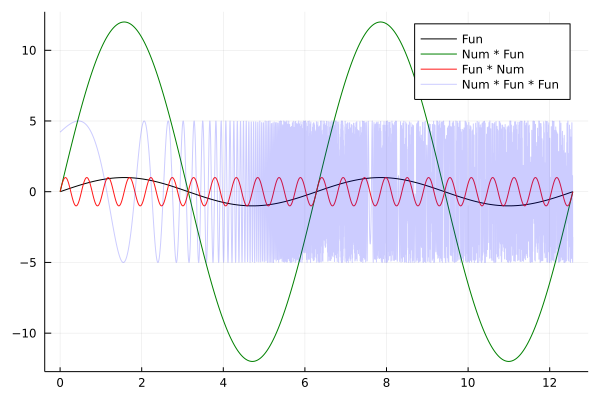

In [39]:
x = pi*(0:0.001:4)

plot(x, sin.(x),    c="black", label="Fun")
plot!(x, (12*sin).(x),    c="green", label="Num * Fun")
plot!(x, (sin*12).(x),    c="red", alpha=0.9, label="Fun * Num")
plot!(x, (5*sin*exp).(x), c="blue", alpha=0.2, label="Num * Fun * Fun")

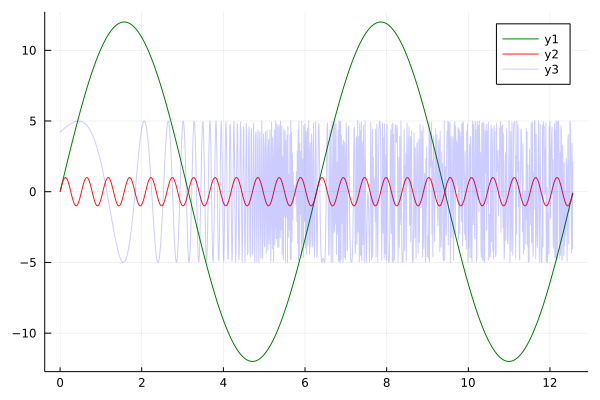

In [40]:
plot([12*sin, sin*12, 5*sin*exp], 0:.01:4π, α=[1 .9 .2], c=[:green :red :blue])

###  "$Sin^2(\phi)$ is odious to me, even though Laplace made use of it; should  it be feared that $sin^2(\phi)$ might become ambiguous, which would perhaps  never occur, or at most very rarely when speaking of $sin(\phi^2)$, well  then, let us write $(sin\phi)^2$, but not $sin^2\phi$, which by analogy  should signify $sin(sin\phi)$." -- Gauss

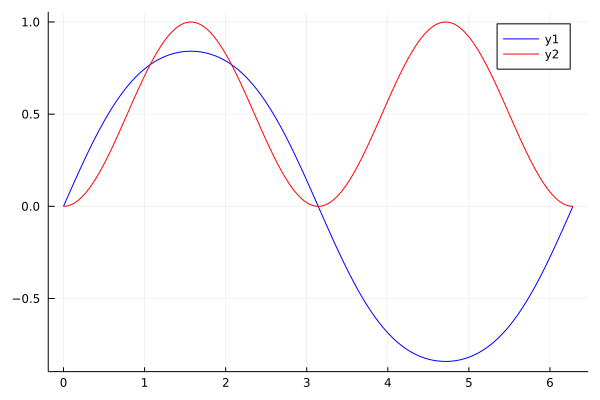

In [41]:
x=(0:.01:2) * pi;

plot(x, (sin^2).(x), c="blue")     # Squaring just works, y=sin(sin(x)), Gauss would be pleased!
plot!(x, sin.(x).^2,  c="red")         

# Exercise 
Try playing around with h

In [42]:
h(a, b::Any) = "fallback"
h(a::Number, b::Number) = "a and b are both numbers"
h(a::Number, b) = "a is a number"
h(a, b::Number) = "b is a number"
h(a::Integer, b::Integer) = "a and b are both integers"

h (generic function with 5 methods)

In [ ]:
# Try playing with h